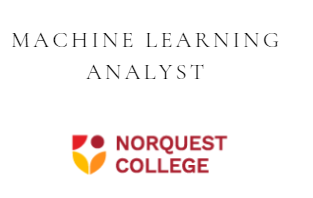

[Link to form](https://docs.google.com/forms/d/1tExBK8RlcBqLLrZCo3IHKlwma2-6qCb66uOJHLT81LM/edit)

[Link to Dataset](https://docs.google.com/spreadsheets/d/1wRp72PgJDvbbyOS5IXtlnCC_0xv6sRbX0dhJmX_Bos0/edit?resourcekey#gid=1842242084)

Before performing any data analysis and exploratory data analysis (EDA), we need to clean and preprocess the dataset. The dataset contains some columns with similar information and others that may not be relevant for analysis. We'll first clean the dataset and then perform EDA.

Here are the steps we'll follow:

**Data Cleaning:**

Remove duplicate and irrelevant columns.

Handle missing values.

Convert data types if necessary.

Rename columns for clarity.

**Exploratory Data Analysis (EDA):**

Summary statistics.

Distribution of numerical variables.

Count of categorical variables.

Visualization (e.g., bar plots, histograms, box plots).


# Data Cleaning


In [ ]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# # Load the dataset (replace with your actual dataset)
# data = pd.read_csv('Proposed Data Collection.csv')

In [ ]:
# Load the dataset with a specified encoding
data = pd.read_csv('Cleaned_FoodDrive_Data.csv', encoding='latin1')

In [ ]:
data.head()

,Timestamp,Email address,Drop Off Location,City,Stake,Ward/Branch,Route Number/Name,# of Adult Volunteers in this route,# of Youth Volunteers in this route,# of Donation Bags Collected/Route,...,Ward/Branch.3,Ward/Branch.4,Ward/Branch.5,Ward/Branch.6,Ward/Branch.7,Comments,Number of routes completed,# of Doors in Route,The time you started at:,The time you ended at
0,9/23/2023 12:53:43,NaN,North Stake Centre,NaN,Edmonton North Stake,Namao Ward,NaN,2.0,2.0,145.0,...,NaN,NaN,NaN,NaN,Namao Ward,NaN,5.0,2500,10:30:00 AM,1:00:00 PM
1,9/23/2023 13:23:10,NaN,North Stake Centre,NaN,Edmonton North Stake,Namao Ward,NaN,1.0,4.0,24.0,...,NaN,NaN,NaN,NaN,Namao Ward,NaN,NaN,211,12:30:00 PM,1:10:00 PM
2,9/23/2023 13:55:30,suzmunoz9@gmail.com,Bearspaw Chapel,NaN,Gateway Stake,Lee Ridge Ward,NaN,3.0,2.0,68.0,...,Lee Ridge Ward,NaN,NaN,NaN,NaN,:),3.0,466,11:15:00 AM,1:40:00 PM
3,9/23/2023 11:47:31,NaN,Bearspaw Chapel,NaN,Gateway Stake,Blackmud Creek Ward,NaN,2.0,0.0,35.0,...,Blackmud Creek Ward,NaN,NaN,NaN,NaN,We enjoyed the experience,NaN,148,3:30:00 PM,5:30:00 PM
4,9/23/2023 12:41:37,baschofield70@gmail.com,Riverbend Stake Centre,NaN,Riverbend Stake,Rabbit Hill Ward,NaN,3.0,1.0,100.0,...,NaN,Rabbit Hill Ward,NaN,NaN,NaN,NaN,2.0,80,NaN,10:15:00 AM


In [ ]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 25 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Timestamp                                             436 non-null    object 
 1   Email address                                         106 non-null    object 
 2   Drop Off Location                                     436 non-null    object 
 3   City                                                  0 non-null      float64
 4   Stake                                                 436 non-null    object 
 5   Ward/Branch                                           437 non-null    object 
 6   Route Number/Name                                     0 non-null      float64
 7   # of Adult Volunteers in this route                   435 non-null    float64
 8   # of Youth Volunteers in this route                   436 no

In [ ]:
# Remove duplicate and irrelevant columns. Email Address occurs twice in columns 1 & 12
data = data.drop(columns=['City','Email address','Email Address', 'Ward/Branch.1', 'Ward/Branch.2', 'Ward/Branch.3', 'Ward/Branch.4', 'Ward/Branch.5', 'Ward/Branch.6','Ward/Branch.7', 'Comments','Route Number/Name'])


In [ ]:
data.head()

,Timestamp,Drop Off Location,Stake,Ward/Branch,# of Adult Volunteers in this route,# of Youth Volunteers in this route,# of Donation Bags Collected/Route,Time to Complete (in minutes) pick up of bags /route,Did you complete more than 1 route?,Number of routes completed,# of Doors in Route,The time you started at:,The time you ended at
0,9/23/2023 12:53:43,North Stake Centre,Edmonton North Stake,Namao Ward,2.0,2.0,145.0,150.0,Yes,5.0,2500,10:30:00 AM,1:00:00 PM
1,9/23/2023 13:23:10,North Stake Centre,Edmonton North Stake,Namao Ward,1.0,4.0,24.0,40.0,No,NaN,211,12:30:00 PM,1:10:00 PM
2,9/23/2023 13:55:30,Bearspaw Chapel,Gateway Stake,Lee Ridge Ward,3.0,2.0,68.0,112.0,Yes,3.0,466,11:15:00 AM,1:40:00 PM
3,9/23/2023 11:47:31,Bearspaw Chapel,Gateway Stake,Blackmud Creek Ward,2.0,0.0,35.0,60.0,No,NaN,148,3:30:00 PM,5:30:00 PM
4,9/23/2023 12:41:37,Riverbend Stake Centre,Riverbend Stake,Rabbit Hill Ward,3.0,1.0,100.0,105.0,Yes,2.0,80,NaN,10:15:00 AM


In [ ]:
# Display basic information about the dataset again
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 13 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Timestamp                                             436 non-null    object 
 1   Drop Off Location                                     436 non-null    object 
 2   Stake                                                 436 non-null    object 
 3   Ward/Branch                                           437 non-null    object 
 4   # of Adult Volunteers in this route                   435 non-null    float64
 5   # of Youth Volunteers in this route                   436 non-null    float64
 6   # of Donation Bags Collected/Route                    435 non-null    float64
 7   Time to Complete (in minutes) pick up of bags /route  436 non-null    float64
 8   Did you complete more than 1 route?                   436 no

In [ ]:
# Get Time Spent

# Convert the "The time you started at" and "The time you ended at" columns to datetime objects
data['The time you started at:'] = pd.to_datetime(data['The time you started at:'])
data['The time you ended at'] = pd.to_datetime(data['The time you ended at'])

# Calculate the time spent and create a new column "Time Spent"
data['Time Spent'] = (data['The time you ended at'] - data['The time you started at:']).dt.total_seconds() / 60

# Print the updated DataFrame
print(data[['The time you started at:', 'The time you ended at', 'Time Spent']])


    The time you started at: The time you ended at  Time Spent
0        2023-10-24 10:30:00   2023-10-24 13:00:00       150.0
1        2023-10-24 12:30:00   2023-10-24 13:10:00        40.0
2        2023-10-24 11:15:00   2023-10-24 13:40:00       145.0
3        2023-10-24 15:30:00   2023-10-24 17:30:00       120.0
4                        NaT   2023-10-24 10:15:00         NaN
..                       ...                   ...         ...
440                      NaT                   NaT         NaN
441                      NaT                   NaT         NaN
442                      NaT                   NaT         NaN
443                      NaT                   NaT         NaN
444                      NaT                   NaT         NaN

[445 rows x 3 columns]


In [ ]:
data.head()

,Timestamp,Drop Off Location,Stake,Ward/Branch,# of Adult Volunteers in this route,# of Youth Volunteers in this route,# of Donation Bags Collected/Route,Time to Complete (in minutes) pick up of bags /route,Did you complete more than 1 route?,Number of routes completed,# of Doors in Route,The time you started at:,The time you ended at,Time Spent
0,9/23/2023 12:53:43,North Stake Centre,Edmonton North Stake,Namao Ward,2.0,2.0,145.0,150.0,Yes,5.0,2500,2023-10-24 10:30:00,2023-10-24 13:00:00,150.0
1,9/23/2023 13:23:10,North Stake Centre,Edmonton North Stake,Namao Ward,1.0,4.0,24.0,40.0,No,NaN,211,2023-10-24 12:30:00,2023-10-24 13:10:00,40.0
2,9/23/2023 13:55:30,Bearspaw Chapel,Gateway Stake,Lee Ridge Ward,3.0,2.0,68.0,112.0,Yes,3.0,466,2023-10-24 11:15:00,2023-10-24 13:40:00,145.0
3,9/23/2023 11:47:31,Bearspaw Chapel,Gateway Stake,Blackmud Creek Ward,2.0,0.0,35.0,60.0,No,NaN,148,2023-10-24 15:30:00,2023-10-24 17:30:00,120.0
4,9/23/2023 12:41:37,Riverbend Stake Centre,Riverbend Stake,Rabbit Hill Ward,3.0,1.0,100.0,105.0,Yes,2.0,80,NaT,2023-10-24 10:15:00,NaN


In [ ]:
# Drop the "The time you started at" and "The time you ended at" columns
data = data.drop(columns=['The time you started at:', 'The time you ended at'])


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Timestamp                                                 9
Drop Off Location                                         9
Stake                                                     9
Ward/Branch                                               8
# of Adult Volunteers in this route                      10
# of Youth Volunteers in this route                       9
# of Donation Bags Collected/Route                       10
Time to Complete (in minutes) pick up of bags /route      9
Did you complete more than 1 route?                       9
Number of routes completed                              297
# of Doors in Route                                      31
Time Spent                                               42
dtype: int64


In [ ]:
data.tail(15)

,Timestamp,Drop Off Location,Stake,Ward/Branch,# of Adult Volunteers in this route,# of Youth Volunteers in this route,# of Donation Bags Collected/Route,Time to Complete (in minutes) pick up of bags /route,Did you complete more than 1 route?,Number of routes completed,# of Doors in Route,Time Spent
430,9/23/2023 12:22:04,Londonderry Chapel,Bonnie Doon Stake,Clareview Ward,3.0,1.0,30.0,60.0,No,NaN,NaN,NaN
431,9/23/2023 12:28:31,Londonderry Chapel,Bonnie Doon Stake,Clareview Ward,1.0,0.0,55.0,180.0,No,NaN,225,NaN
432,9/23/2023 12:42:05,Londonderry Chapel,Bonnie Doon Stake,Clareview Ward,4.0,0.0,200.0,240.0,Yes,7.0,607,NaN
433,9/23/2023 12:03:51,Gateway Stake Centre,Gateway Stake,Ellerslie Ward,2.0,4.0,40.0,37.0,No,NaN,207,NaN
434,9/23/2023 11:29:41,Coronation Park Chapel,Bonnie Doon Stake,Coronation Park Ward,1.0,1.0,38.0,90.0,Yes,2.0,300,NaN
435,9/23/2023 11:33:17,Coronation Park Chapel,Edmonton North Stake,Stony Plain Ward,1.0,0.0,30.0,47.0,Yes,2.0,155,NaN
436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# subset=['# of Donation Bags Collected/Route','Time to Complete (in minutes) pick up of bags /route','Did you complete more than 1 route?','Number of routes completed','# of Doors in Route','Time Spent'],
# Keep with at least half the columns filled out
data.tail(10)
# data.dropna(subset=['Time Spent','Number of routes completed']) 136
data.dropna(subset=['# of Donation Bags Collected/Route','Time to Complete (in minutes) pick up of bags /route','Did you complete more than 1 route?','Number of routes completed','# of Doors in Route','Time Spent'],thresh=3,inplace=True)

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Timestamp                                                 0
Drop Off Location                                         0
Stake                                                     0
Ward/Branch                                               2
# of Adult Volunteers in this route                       1
# of Youth Volunteers in this route                       0
# of Donation Bags Collected/Route                        1
Time to Complete (in minutes) pick up of bags /route      0
Did you complete more than 1 route?                       0
Number of routes completed                              290
# of Doors in Route                                      22
Time Spent                                               33
dtype: int64


In [ ]:
data['Time Spent'].fillna(data['Time to Complete (in minutes) pick up of bags /route'],inplace=True)
data['Time to Complete (in minutes) pick up of bags /route'].fillna(data['Time Spent'],inplace=True)

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Timestamp                                                 0
Drop Off Location                                         0
Stake                                                     0
Ward/Branch                                               2
# of Adult Volunteers in this route                       1
# of Youth Volunteers in this route                       0
# of Donation Bags Collected/Route                        1
Time to Complete (in minutes) pick up of bags /route      0
Did you complete more than 1 route?                       0
Number of routes completed                              290
# of Doors in Route                                      22
Time Spent                                                0
dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436 entries, 0 to 435
Data columns (total 12 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Timestamp                                             436 non-null    object 
 1   Drop Off Location                                     436 non-null    object 
 2   Stake                                                 436 non-null    object 
 3   Ward/Branch                                           434 non-null    object 
 4   # of Adult Volunteers in this route                   435 non-null    float64
 5   # of Youth Volunteers in this route                   436 non-null    float64
 6   # of Donation Bags Collected/Route                    435 non-null    float64
 7   Time to Complete (in minutes) pick up of bags /route  436 non-null    float64
 8   Did you complete more than 1 route?                   436 no

In [ ]:
# Convert "Number of routes completed" and "# of Doors in Route" columns to numeric. Currently "objects"
#data['Number of routes completed'] = pd.to_numeric(data['Number of routes completed'], errors='coerce')
data['# of Doors in Route'] = pd.to_numeric(data['# of Doors in Route'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436 entries, 0 to 435
Data columns (total 12 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Timestamp                                             436 non-null    object 
 1   Drop Off Location                                     436 non-null    object 
 2   Stake                                                 436 non-null    object 
 3   Ward/Branch                                           434 non-null    object 
 4   # of Adult Volunteers in this route                   435 non-null    float64
 5   # of Youth Volunteers in this route                   436 non-null    float64
 6   # of Donation Bags Collected/Route                    435 non-null    float64
 7   Time to Complete (in minutes) pick up of bags /route  436 non-null    float64
 8   Did you complete more than 1 route?                   436 no

In [ ]:
# Handle missing values (if any)
# Calculate the average values for 'Number of routes completed' and '# of Doors in Route'
#### Number of routes should only be set to mean if more than one was completed and more than 1 route check was filled
avg_routes_completed = data['Number of routes completed'].mean()
avg_doors_in_route = data['# of Doors in Route'].mean()
avg_time_spent = data['Time Spent'].mean()

# Fill missing values with the averages
# data['Number of routes completed'].fillna(avg_routes_completed, inplace=True)
# data[data['Did you complete more than 1 route?'] == 'Yes']['Number of routes completed].fillna(avg_routes_completed, inplace=True)
# Number of routes completed should default to 1, since it is ONLY FILLED when there is MORE THAN 1 route
data['Number of routes completed'].fillna(1, inplace=True)
data['# of Doors in Route'].fillna(avg_doors_in_route, inplace=True)
data['Time Spent'].fillna(avg_time_spent, inplace=True)
data.head()



,Timestamp,Drop Off Location,Stake,Ward/Branch,# of Adult Volunteers in this route,# of Youth Volunteers in this route,# of Donation Bags Collected/Route,Time to Complete (in minutes) pick up of bags /route,Did you complete more than 1 route?,Number of routes completed,# of Doors in Route,Time Spent
0,9/23/2023 12:53:43,North Stake Centre,Edmonton North Stake,Namao Ward,2.0,2.0,145.0,150.0,Yes,5.0,2500.0,150.0
1,9/23/2023 13:23:10,North Stake Centre,Edmonton North Stake,Namao Ward,1.0,4.0,24.0,40.0,No,1.0,211.0,40.0
2,9/23/2023 13:55:30,Bearspaw Chapel,Gateway Stake,Lee Ridge Ward,3.0,2.0,68.0,112.0,Yes,3.0,466.0,145.0
3,9/23/2023 11:47:31,Bearspaw Chapel,Gateway Stake,Blackmud Creek Ward,2.0,0.0,35.0,60.0,No,1.0,148.0,120.0
4,9/23/2023 12:41:37,Riverbend Stake Centre,Riverbend Stake,Rabbit Hill Ward,3.0,1.0,100.0,105.0,Yes,2.0,80.0,105.0


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Timestamp                                               0
Drop Off Location                                       0
Stake                                                   0
Ward/Branch                                             2
# of Adult Volunteers in this route                     1
# of Youth Volunteers in this route                     0
# of Donation Bags Collected/Route                      1
Time to Complete (in minutes) pick up of bags /route    0
Did you complete more than 1 route?                     0
Number of routes completed                              0
# of Doors in Route                                     0
Time Spent                                              0
dtype: int64


In [ ]:
# Rename columns for clarity
data = data.rename(columns={
    'Timestamp': 'Date',
    'Drop Off Location': 'Location',
    'City': 'City',
    'Stake': 'Stake',
    'Route Number/Name': 'Route',
    '# of Adult Volunteers in this route': '# of Adult Volunteers',
    '# of Youth Volunteers in this route': '# of Youth Volunteers',
    '# of Donation Bags Collected/Route': 'Donation Bags Collected',
    'Time to Complete (in minutes) pick up of bags /route': 'Time to Complete (min)',
    'Did you complete more than 1 route?': 'Completed More Than One Route',
    'Number of routes completed': 'Routes Completed',
    '# of Doors in Route': 'Doors in Route'
})


In [ ]:
# Print the dtypes for each column
data.dtypes

Date                              object
Location                          object
Stake                             object
Ward/Branch                       object
# of Adult Volunteers            float64
# of Youth Volunteers            float64
Donation Bags Collected          float64
Time to Complete (min)           float64
Completed More Than One Route     object
Routes Completed                 float64
Doors in Route                   float64
Time Spent                       float64
dtype: object

In [ ]:
# Convert columns to integer data types
int_columns = ['# of Adult Volunteers', '# of Youth Volunteers', 'Donation Bags Collected','Routes Completed','Doors in Route']
# data[int_columns] = data[int_columns].astype(int)
data[int_columns] = data[int_columns].fillna(data[int_columns].mean()).astype(int)

If errors like this pop up:
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
.....

ValueError: invalid literal for int() with base 10: 'Two'
You might need to do a search of the erroneous word in the dataset and replace with values.

Reupload the dataset and rerun.

In [ ]:
# Convert columns to the right data types
data['Date'] = pd.to_datetime(data['Date'])  # Convert 'Date' to datetime
data['Routes Completed'] = data['Routes Completed'].astype(int)  # Convert 'Routes Completed' to float
data['Doors in Route'] = data['Doors in Route'].astype(int)  # Convert 'Doors in Route' to float
data['Time Spent'] = data['Time Spent'].astype(float)  # Convert 'Time Spent' to float




In [ ]:
data['Completed More Than One Route'] = data['Completed More Than One Route'].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)
# data['Completed More Than One Route'] = data['Completed More Than One Route'].astype(str)
print(data.dtypes)



Date                             datetime64[ns]
Location                                 object
Stake                                    object
Ward/Branch                              object
# of Adult Volunteers                     int64
# of Youth Volunteers                     int64
Donation Bags Collected                   int64
Time to Complete (min)                  float64
Completed More Than One Route             int64
Routes Completed                          int64
Doors in Route                            int64
Time Spent                              float64
dtype: object


In [ ]:
duplicate_rows = data.duplicated()
duplicate_rows.value_counts()

False    436
dtype: int64

In [ ]:
data = data[~duplicate_rows]
data.duplicated().value_counts()

False    436
dtype: int64

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Date                             0
Location                         0
Stake                            0
Ward/Branch                      2
# of Adult Volunteers            0
# of Youth Volunteers            0
Donation Bags Collected          0
Time to Complete (min)           0
Completed More Than One Route    0
Routes Completed                 0
Doors in Route                   0
Time Spent                       0
dtype: int64


In [ ]:
data.head()

,Date,Location,Stake,Ward/Branch,# of Adult Volunteers,# of Youth Volunteers,Donation Bags Collected,Time to Complete (min),Completed More Than One Route,Routes Completed,Doors in Route,Time Spent
0,2023-09-23 12:53:43,North Stake Centre,Edmonton North Stake,Namao Ward,2,2,145,150.0,1,5,2500,150.0
1,2023-09-23 13:23:10,North Stake Centre,Edmonton North Stake,Namao Ward,1,4,24,40.0,0,1,211,40.0
2,2023-09-23 13:55:30,Bearspaw Chapel,Gateway Stake,Lee Ridge Ward,3,2,68,112.0,1,3,466,145.0
3,2023-09-23 11:47:31,Bearspaw Chapel,Gateway Stake,Blackmud Creek Ward,2,0,35,60.0,0,1,148,120.0
4,2023-09-23 12:41:37,Riverbend Stake Centre,Riverbend Stake,Rabbit Hill Ward,3,1,100,105.0,1,2,80,105.0


In [ ]:
data.tail()

,Date,Location,Stake,Ward/Branch,# of Adult Volunteers,# of Youth Volunteers,Donation Bags Collected,Time to Complete (min),Completed More Than One Route,Routes Completed,Doors in Route,Time Spent
431,2023-09-23 12:28:31,Londonderry Chapel,Bonnie Doon Stake,Clareview Ward,1,0,55,180.0,0,1,225,180.0
432,2023-09-23 12:42:05,Londonderry Chapel,Bonnie Doon Stake,Clareview Ward,4,0,200,240.0,1,7,607,240.0
433,2023-09-23 12:03:51,Gateway Stake Centre,Gateway Stake,Ellerslie Ward,2,4,40,37.0,0,1,207,37.0
434,2023-09-23 11:29:41,Coronation Park Chapel,Bonnie Doon Stake,Coronation Park Ward,1,1,38,90.0,1,2,300,90.0
435,2023-09-23 11:33:17,Coronation Park Chapel,Edmonton North Stake,Stony Plain Ward,1,0,30,47.0,1,2,155,47.0


In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
# Subset selects columns to check
# data.dropna(subset=['Date'],inplace=True)
# data.tail()

In [ ]:
data['Bags/Door'] = data['Donation Bags Collected']/data['Doors in Route']
data['Bags/Route'] = data['Donation Bags Collected']/data['Routes Completed']
data.drop(columns=['Completed More Than One Route'],inplace=True)

In [ ]:
data

,Date,Location,Stake,Ward/Branch,# of Adult Volunteers,# of Youth Volunteers,Donation Bags Collected,Time to Complete (min),Routes Completed,Doors in Route,Time Spent,Bags/Door,Bags/Route
0,2023-09-23 12:53:43,North Stake Centre,Edmonton North Stake,Namao Ward,2,2,145,150.0,5,2500,150.0,0.058000,29.000000
1,2023-09-23 13:23:10,North Stake Centre,Edmonton North Stake,Namao Ward,1,4,24,40.0,1,211,40.0,0.113744,24.000000
2,2023-09-23 13:55:30,Bearspaw Chapel,Gateway Stake,Lee Ridge Ward,3,2,68,112.0,3,466,145.0,0.145923,22.666667
3,2023-09-23 11:47:31,Bearspaw Chapel,Gateway Stake,Blackmud Creek Ward,2,0,35,60.0,1,148,120.0,0.236486,35.000000
4,2023-09-23 12:41:37,Riverbend Stake Centre,Riverbend Stake,Rabbit Hill Ward,3,1,100,105.0,2,80,105.0,1.250000,50.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,2023-09-23 12:28:31,Londonderry Chapel,Bonnie Doon Stake,Clareview Ward,1,0,55,180.0,1,225,180.0,0.244444,55.000000
432,2023-09-23 12:42:05,Londonderry Chapel,Bonnie Doon Stake,Clareview Ward,4,0,200,240.0,7,607,240.0,0.329489,28.571429
433,2023-09-23 12:03:51,Gateway Stake Centre,Gateway Stake,Ellerslie Ward,2,4,40,37.0,1,207,37.0,0.193237,40.000000
434,2023-09-23 11:29:41,Coronation Park Chapel,Bonnie Doon Stake,Coronation Park Ward,1,1,38,90.0,2,300,90.0,0.126667,19.000000


# Exploratory Data Analysis

In [ ]:
data.describe()

,# of Adult Volunteers,# of Youth Volunteers,Donation Bags Collected,Time to Complete (min),Routes Completed,Doors in Route,Time Spent,Bags/Door,Bags/Route
count,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000
mean,2.440367,1.575688,32.944954,55.360092,1.472477,195.412844,61.383028,0.321182,22.842480
std,3.657601,1.889172,35.766313,33.886303,0.900408,175.373085,46.515627,1.058549,15.261851
min,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,3.000000,0.010000,1.000000
25%,2.000000,0.000000,17.000000,31.500000,1.000000,115.000000,36.750000,0.109074,15.000000
50%,2.000000,1.000000,25.000000,45.000000,1.000000,171.500000,55.000000,0.151949,20.000000
75%,2.000000,3.000000,37.250000,60.000000,2.000000,219.000000,75.000000,0.217561,28.392857
max,46.000000,20.000000,555.000000,270.000000,8.000000,2500.000000,740.000000,21.000000,185.000000


In [ ]:
filtered_data = data.copy()
filtered_data = filtered_data[filtered_data['Doors in Route'] <= filtered_data['Doors in Route'].mean()+(filtered_data['Doors in Route'].std()*3)]
filtered_data = filtered_data[filtered_data['Donation Bags Collected'] <= filtered_data['Donation Bags Collected'].mean()+(3*data['Donation Bags Collected'].std())]
filtered_data = filtered_data[filtered_data['# of Adult Volunteers'] <= filtered_data['# of Adult Volunteers'].mean()+(3*data['# of Adult Volunteers'].std())]
filtered_data = filtered_data[filtered_data['# of Youth Volunteers'] <= filtered_data['# of Youth Volunteers'].mean()+(3*data['# of Youth Volunteers'].std())]
filtered_data = filtered_data[filtered_data['Time to Complete (min)'] <= filtered_data['Time to Complete (min)'].mean()+(3*data['Time to Complete (min)'].std())]
filtered_data = filtered_data[filtered_data['Time Spent'] <= filtered_data['Time Spent'].mean()+(3*data['Time Spent'].std())]
filtered_data = filtered_data[filtered_data['Routes Completed'] <= filtered_data['Routes Completed'].mean()+(3*data['Routes Completed'].std())]
filtered_data.shape

(409, 13)

In [ ]:
filtered_data['Total Volunteers'] = filtered_data['# of Adult Volunteers'] + filtered_data['# of Youth Volunteers']
filtered_data.head()

,Date,Location,Stake,Ward/Branch,# of Adult Volunteers,# of Youth Volunteers,Donation Bags Collected,Time to Complete (min),Routes Completed,Doors in Route,Time Spent,Bags/Door,Bags/Route,Total Volunteers
1,2023-09-23 13:23:10,North Stake Centre,Edmonton North Stake,Namao Ward,1,4,24,40.0,1,211,40.0,0.113744,24.000000,5
2,2023-09-23 13:55:30,Bearspaw Chapel,Gateway Stake,Lee Ridge Ward,3,2,68,112.0,3,466,145.0,0.145923,22.666667,5
3,2023-09-23 11:47:31,Bearspaw Chapel,Gateway Stake,Blackmud Creek Ward,2,0,35,60.0,1,148,120.0,0.236486,35.000000,2
4,2023-09-23 12:41:37,Riverbend Stake Centre,Riverbend Stake,Rabbit Hill Ward,3,1,100,105.0,2,80,105.0,1.250000,50.000000,4
5,2023-09-23 10:36:10,Londonderry Chapel,Bonnie Doon Stake,Clareview Ward,1,3,14,25.0,1,14,25.0,1.000000,14.000000,4


In [ ]:
data_IQR = data.copy()
columns = ['Doors in Route','Donation Bags Collected']
for col in columns:
  q1 = data[col].quantile(0.25)
  q3 = data[col].quantile(0.75)
  iqr = q3 - q1
  outliers = data.loc[(data[col] < q1 - 1.5*iqr) | (data[col] > q3 + 1.5*iqr)]
  mask = data_IQR.index.isin(outliers.index)
  # print(col,'\nRows:',outliers.shape[0])
  data_IQR = data_IQR[~mask]

[]

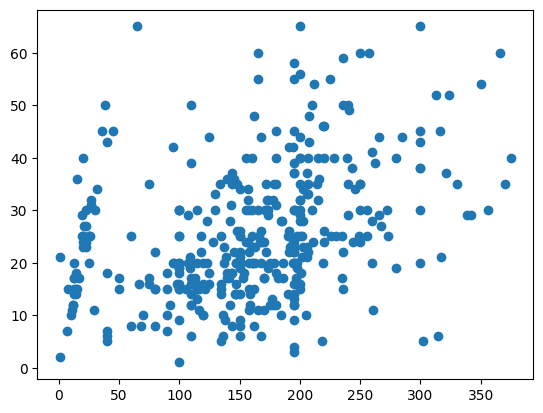

In [ ]:
plt.scatter(data_IQR['Doors in Route'],data_IQR['Donation Bags Collected'])
plt.plot()

[]

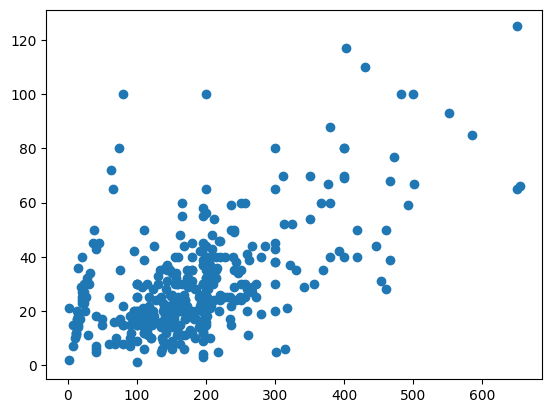

In [ ]:
plt.scatter(filtered_data['Doors in Route'],filtered_data['Donation Bags Collected'])
plt.plot()

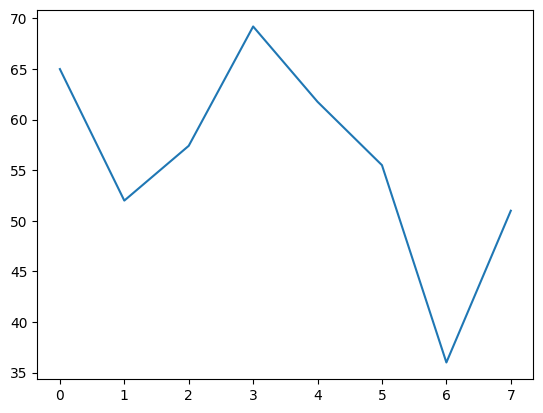

In [ ]:
avg_time = filtered_data[['# of Adult Volunteers','Time Spent']].groupby('# of Adult Volunteers').mean()
avg_time
plt.plot(avg_time.index,avg_time['Time Spent'])

Text(0.5, 1.0, 'Distribution of Adult Volunteers')

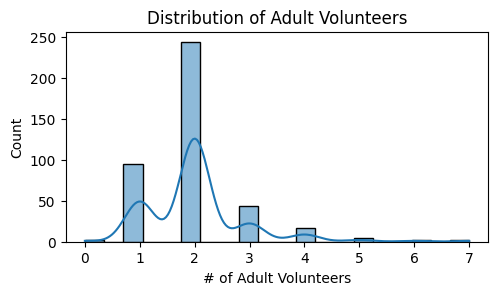

In [ ]:
# Visualize the distribution of numerical features
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(filtered_data['# of Adult Volunteers'], bins=20, kde=True)
plt.title('Distribution of Adult Volunteers')

Text(0.5, 1.0, 'Distribution of Youth Volunteers')

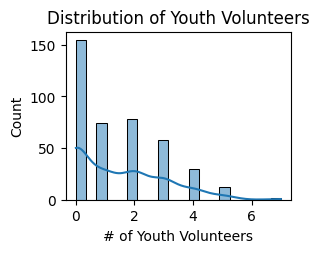

In [ ]:
plt.subplot(2, 2, 2)
sns.histplot(filtered_data['# of Youth Volunteers'], bins=20, kde=True)
plt.title('Distribution of Youth Volunteers')

<function matplotlib.pyplot.show(close=None, block=None)>

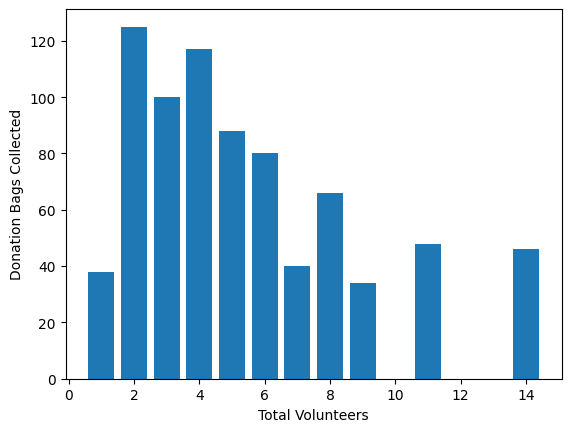

In [ ]:
plt.bar(filtered_data['Total Volunteers'], filtered_data['Donation Bags Collected'])
plt.xlabel("Total Volunteers")
plt.ylabel("Donation Bags Collected")
plt.show

Text(0.5, 1.0, 'Distribution of Donation Bags Collected')

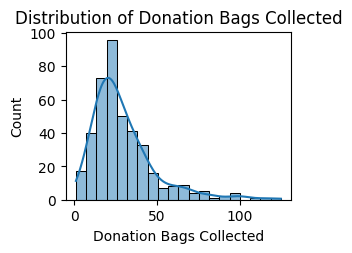

In [ ]:
plt.subplot(2, 2, 3)
sns.histplot(filtered_data['Donation Bags Collected'], bins=20, kde=True)
plt.title('Distribution of Donation Bags Collected')

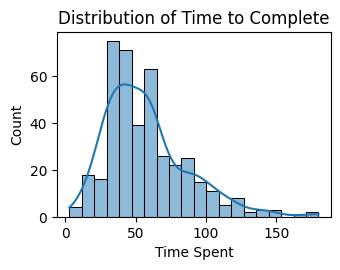

In [ ]:
plt.subplot(2, 2, 4)
sns.histplot(filtered_data['Time Spent'], bins=20, kde=True)
plt.title('Distribution of Time to Complete')

plt.tight_layout()
plt.show()


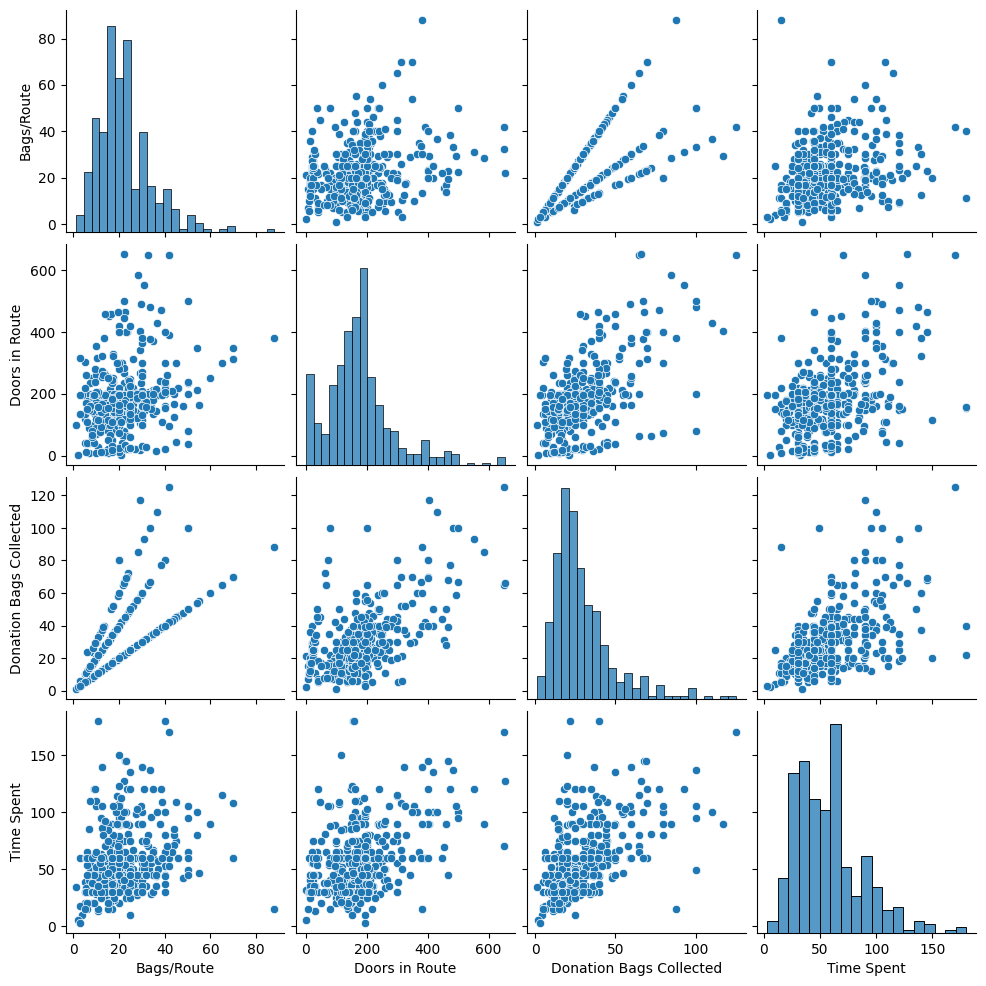

In [ ]:
# Visualize relationships between numerical features
sns.pairplot(filtered_data[['Bags/Route', 'Doors in Route', 'Donation Bags Collected', 'Time Spent']])
plt.show()

In [ ]:
# # Visualize relationships between categorical features (if any)
# # Replace 'categorical_column' with your actual categorical column name
# if 'categorical_column' in data.columns:
#     sns.countplot(x='categorical_column', data=data)
#     plt.title('Countplot of Categorical Column')
#     plt.show()


<ipython-input-144-21627cfa2264>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = filtered_data.corr()


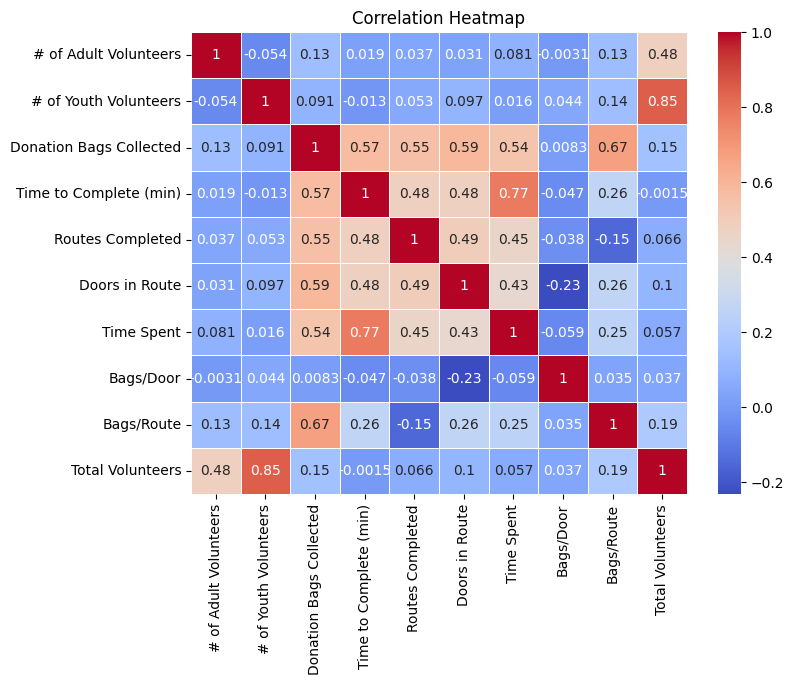

In [ ]:
# Correlation heatmap for numerical features
correlation_matrix = filtered_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


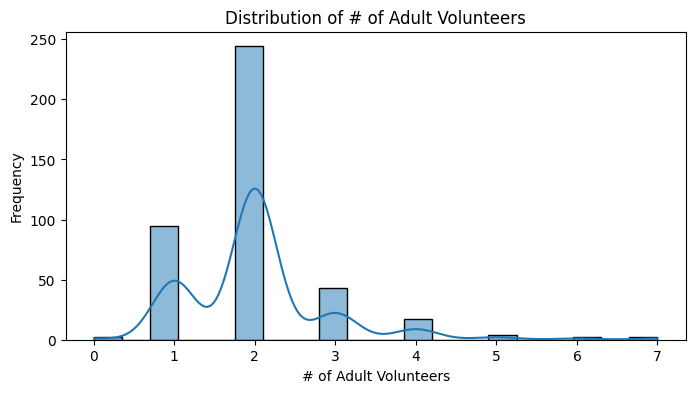

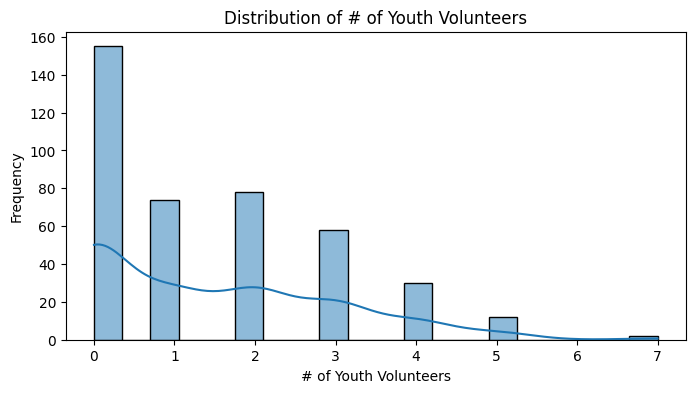

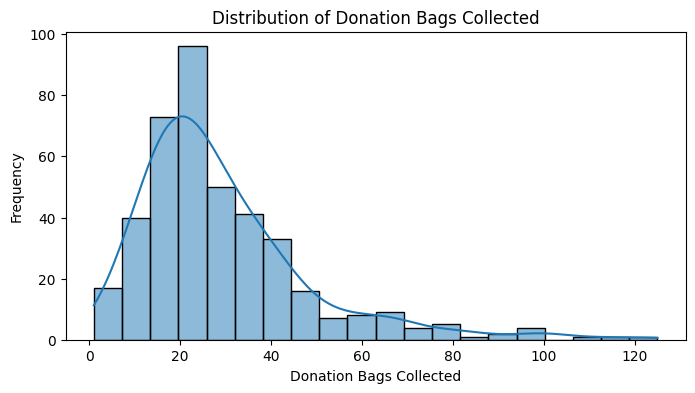

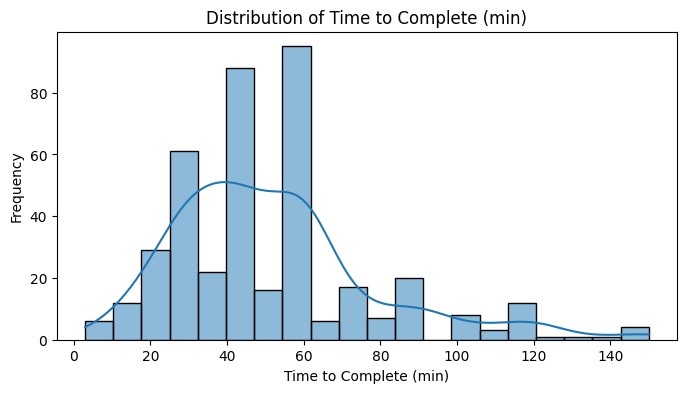

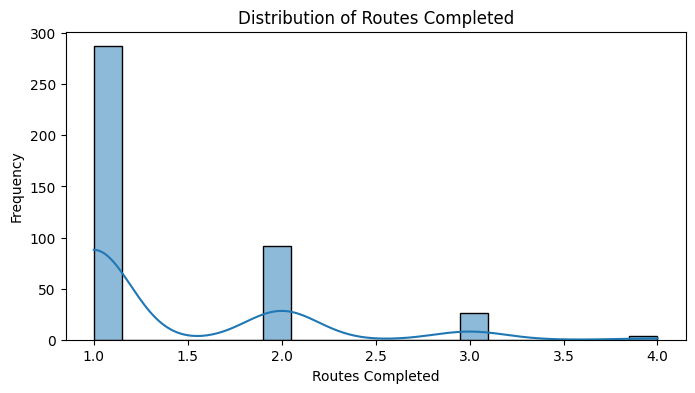

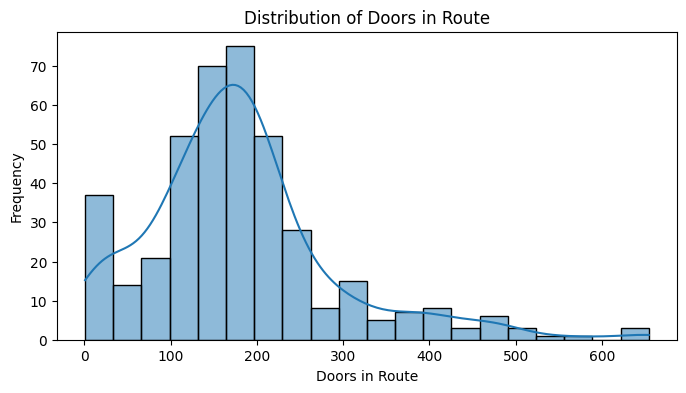

In [ ]:
# Distribution of numerical variables
numerical_columns = ['# of Adult Volunteers', '# of Youth Volunteers', 'Donation Bags Collected', 'Time to Complete (min)', 'Routes Completed', 'Doors in Route']
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=filtered_data, x=col, bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

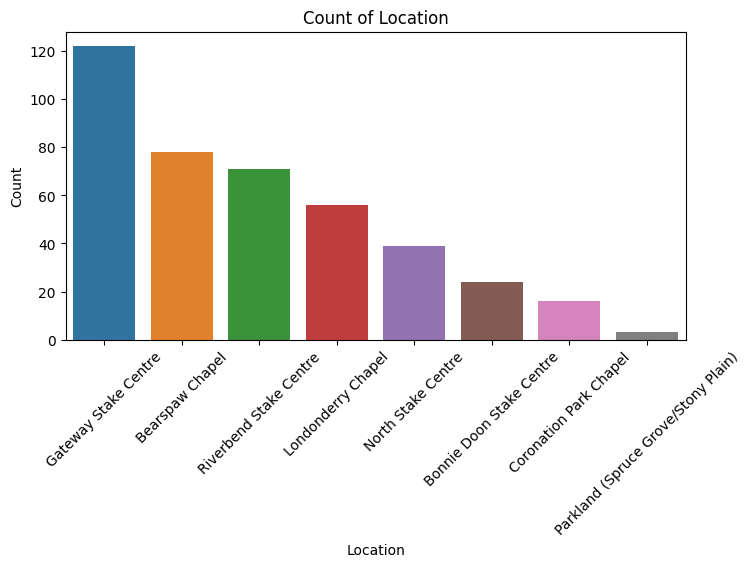

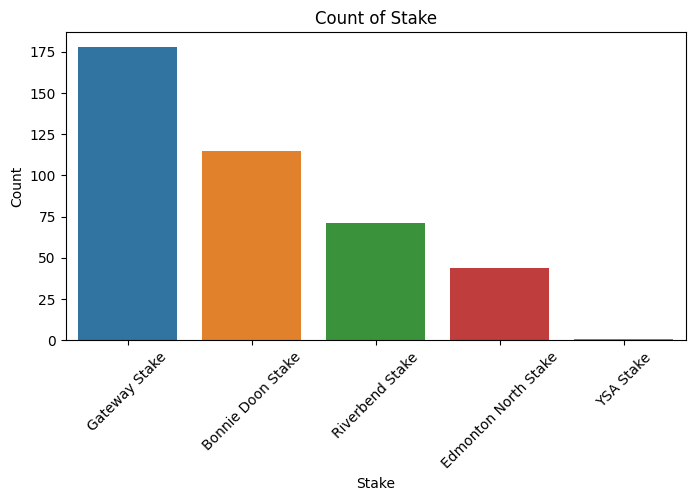

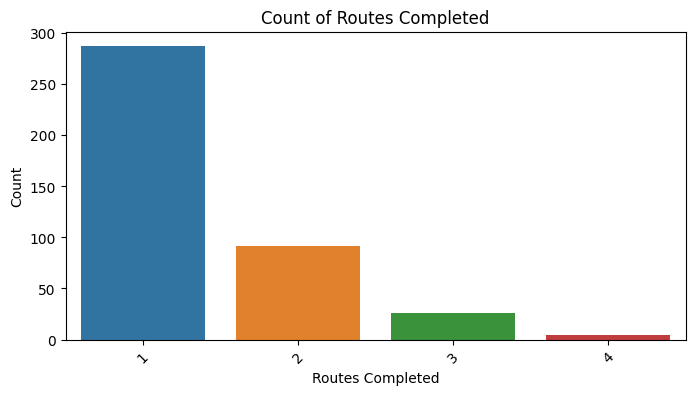

In [ ]:
# Count of categorical variables
categorical_columns = ['Location','Stake','Routes Completed']
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=filtered_data, x=col, order=filtered_data[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

<ipython-input-147-c597c086ac96>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered_data, x='Stake', y='Donation Bags Collected', ci=None)


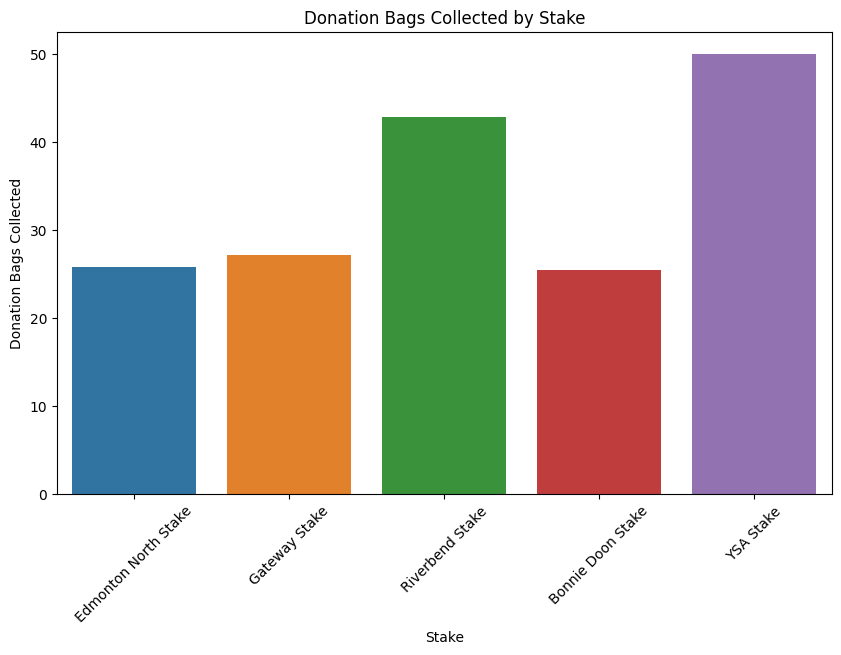

In [ ]:

# Visualizations (customize as needed)
# Example: Bar plot of Stake vs. Donation Bags Collected
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_data, x='Stake', y='Donation Bags Collected', ci=None)
plt.title('Donation Bags Collected by Stake')
plt.xlabel('Stake')
plt.ylabel('Donation Bags Collected')
plt.xticks(rotation=45)
plt.show()


# Modelling

Predicting the number of donation bags collected is a regression problem, and there are several regression models you can use in addition to Linear Regression. Here are some commonly used regression models:

Ridge Regression and Lasso Regression: These are extensions of Linear Regression that add regularization to the model to prevent overfitting. Ridge regression uses L2 regularization, and Lasso regression uses L1 regularization.

Support Vector Regression (SVR): SVR is a regression technique that extends Support Vector Machines (SVM) to regression problems. It is particularly useful when dealing with non-linear relationships.

ElasticNet Regression: ElasticNet combines L1 and L2 regularization, offering a balance between Ridge and Lasso regression. It can handle cases where some features are irrelevant or redundant.

Polynomial Regression: Polynomial regression allows you to capture non-linear relationships by introducing polynomial features. It's suitable when the relationship between the input features and the target variable is curvilinear.

Random Forest Regression: Random Forest can also be used for regression tasks. It combines multiple decision trees to provide robust predictions.

Gradient Boosting Regressors: Algorithms like XGBoost, LightGBM, and CatBoost have regression variants. They are powerful and often provide state-of-the-art performance for regression tasks.

K-Nearest Neighbors (KNN) Regression: KNN can be adapted for regression by predicting the target variable as the average or weighted average of the K nearest neighbors' target values.

Neural Networks (Deep Learning): You can use deep learning models, such as feedforward neural networks, to perform regression tasks. Neural networks can capture complex relationships in the data.

Gaussian Process Regression: Gaussian process regression is a probabilistic approach that models the target variable as a distribution, providing uncertainty estimates along with predictions.

Decision Tree Regression: Decision trees can be used for regression as well as classification. They partition the data and predict the target variable as the average of the target values in each leaf node.

Bayesian Regression: Bayesian regression models incorporate Bayesian techniques to estimate model parameters and provide uncertainty estimates in predictions.

In [ ]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Solution 1: Donation Prediction

In [ ]:
X = data[['Routes Completed','# of Adult Volunteers','Doors in Route', '# of Youth Volunteers','Donation Bags Collected']]
y = data[ 'Time Spent']

In [ ]:
ward_models = []

for ward in data['Ward/Branch'].unique():

  X = data.loc[data['Ward/Branch'] == ward,['Routes Completed','# of Adult Volunteers','Doors in Route', '# of Youth Volunteers','Donation Bags Collected']]
  y = data.loc[data['Ward/Branch'] == ward,['Time Spent']]

  if len(data.loc[data['Ward/Branch'] == ward]) <= 1: continue
  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

  linearReg = LinearRegression()
  linearReg.fit(X_train,y_train)
  linearPred = linearReg.predict(X_test)

  # Evaluate the model
  LinReg_mse = mean_squared_error(y_test, linearPred)
  print(ward)
  print(f"Mean Squared Error: {LinReg_mse}\n")

Namao Ward
Mean Squared Error: 1777.7218825645057

Lee Ridge Ward
Mean Squared Error: 670.2043077952486

Blackmud Creek Ward
Mean Squared Error: 4824.7124045828195

Rabbit Hill Ward
Mean Squared Error: 260.2477849638461

Clareview Ward
Mean Squared Error: 4702.141885183329

Crawford Plains Ward
Mean Squared Error: 275.38867854124084

Silver Berry Ward
Mean Squared Error: 62956.26716710448

Connors Hill Ward
Mean Squared Error: 5650.554497107774

Stony Plain Ward
Mean Squared Error: 7393.274543856907

Londonderry Ward
Mean Squared Error: 215.208705075628

Southgate Ward
Mean Squared Error: 6424.356904382608

Greenfield Ward
Mean Squared Error: 80.3762063315106

Rutherford Ward
Mean Squared Error: 50.44814846848586

Griesbach Ward
Mean Squared Error: 716.8316434467349

Ellerslie Ward
Mean Squared Error: 1634.9446376852036

Forest Heights Ward
Mean Squared Error: 313.3057056310326

Coronation Park Ward
Mean Squared Error: 45.55498824173545

Woodbend Ward
Mean Squared Error: 3840.621743751

# Compare with other Regressor Models

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Standardize features (required for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Implement Decision Tree Regression
decision_tree = DecisionTreeRegressor(max_depth=5)  # You can adjust the maximum depth
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

# Implement K-Nearest Neighbors (KNN) Regression
knn = KNeighborsRegressor(n_neighbors=3)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Implement Random Forest Regression
random_forest = RandomForestRegressor(n_estimators=100)  # You can adjust the number of trees (n_estimators)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)

# Implement Gradient Boosting Regression
gradient_boosting = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)  # You can adjust hyperparameters
gradient_boosting.fit(X_train, y_train)
y_pred_gradient_boosting = gradient_boosting.predict(X_test)

<ipython-input-65-a9d8e1169f2b>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse}")
    print(f"{model_name} - R-squared (R²): {r2}\n")

In [ ]:
evaluate_model(y_test, y_pred_decision_tree, "Decision Tree")
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors (KNN)")
evaluate_model(y_test, y_pred_random_forest, "Random Forest")
evaluate_model(y_test, y_pred_gradient_boosting, "Gradient Boosting")

Decision Tree - Mean Squared Error: 4.0
Decision Tree - R-squared (R²): nan

K-Nearest Neighbors (KNN) - Mean Squared Error: 1.7777777777777841
K-Nearest Neighbors (KNN) - R-squared (R²): nan

Random Forest - Mean Squared Error: 6.760000000000008
Random Forest - R-squared (R²): nan

Gradient Boosting - Mean Squared Error: 23.439664911299104
Gradient Boosting - R-squared (R²): nan



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


*Which model performed best?*

From the above, it seems K-Nearest Neighbors (KNN) is the model that performed best

# Save the best performing model

In [ ]:
!pip install joblib

In [ ]:
import joblib

# Assuming 'random_forest' is your best trained Random Forest Regressor model
model = knn  # Replace with your actual model

# Specify the file path where you want to save the model
model_filename = 'C:\Users\fadek\Dropbox\PC\Documents\Norquest\2nd Yr 1st Semester Courses\CMPT 3830 - ML int proj\knn_model.pkl'

# Save the model to a .pkl file
joblib.dump(model, model_filename)

# Determine Feature Imporance- Regression Models

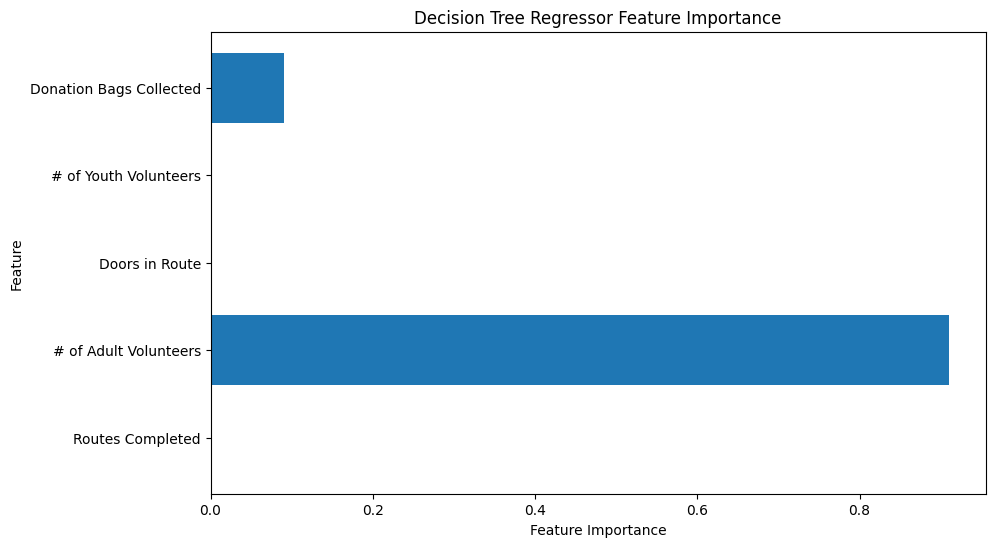

In [ ]:
# Assuming 'decision_tree' is your trained Decision Tree Regressor model
feature_importance = decision_tree.feature_importances_
feature_names = X.columns

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Regressor Feature Importance')
plt.show()


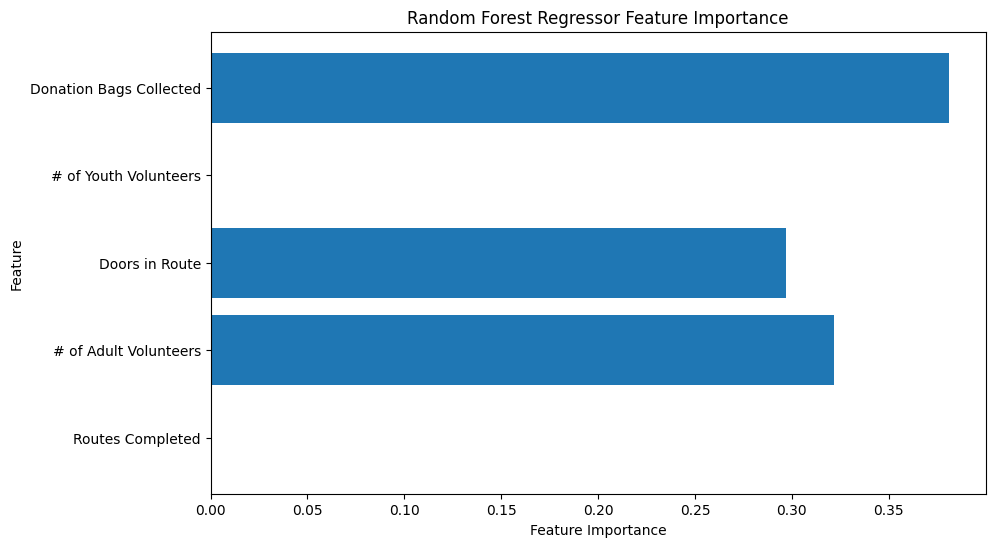

In [ ]:
# Assuming 'random_forest' is your trained Random Forest Regressor model
feature_importance = random_forest.feature_importances_
feature_names = X.columns

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Regressor Feature Importance')
plt.show()

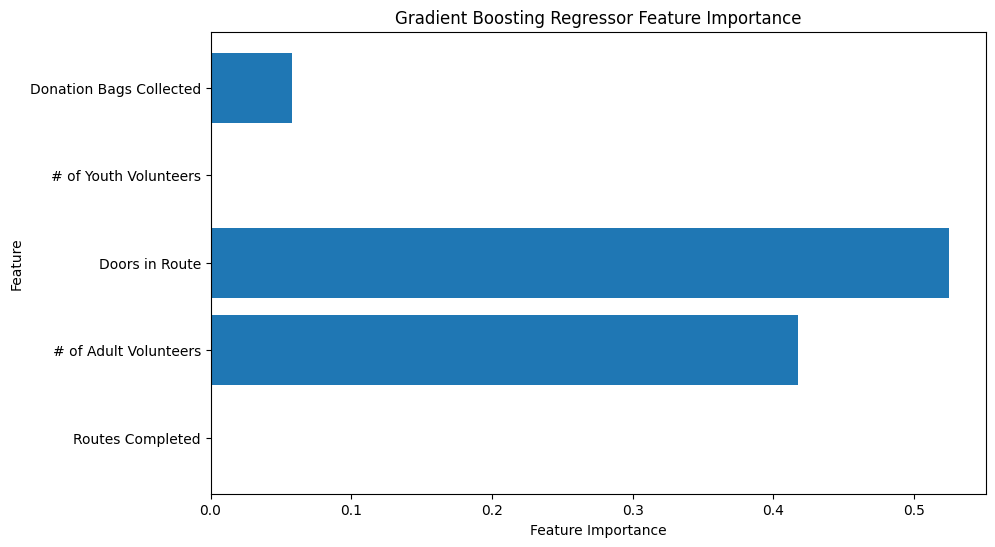

In [ ]:
# Assuming 'gradient_boosting' is your trained Gradient Boosting Regressor model
feature_importance = gradient_boosting.feature_importances_
feature_names = X.columns

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Gradient Boosting Regressor Feature Importance')
plt.show()


# Solution 2: Convert to a Classification Problem

To do this we can set a threshold for the number of bags collected to determine whether a donation drive is considered successful or not. This threshold can be used to convert your regression task (predicting the number of bags collected) into a classification task (predicting whether the threshold was met or not).

In [ ]:
threshold = 50  # Define your threshold here. In this case the Threshold is 50 bags
data['Success'] = (data['Donation Bags Collected'] >= threshold).astype(int)

# Check for Data imbalance

In [ ]:
import matplotlib.pyplot as plt

# Calculate value counts for the 'Success' column
success_counts = data['Success'].value_counts()


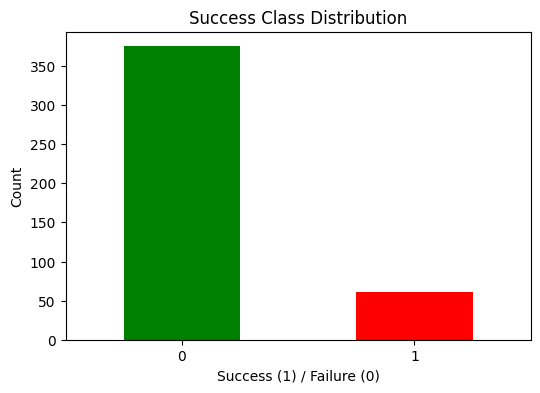

In [ ]:
# Plotting the bar plot
plt.figure(figsize=(6, 4))
success_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Success Class Distribution')
plt.xlabel('Success (1) / Failure (0)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Consider reducing your threshold for better balance. Try #40, #30...etc

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Assuming the target variable is in a column named 'Success' (1 for success, 0 for failure)
X = data[['Routes Completed','# of Adult Volunteers','Doors in Route', '# of Youth Volunteers','Donation Bags Collected', 'Time Spent']]
y = data['Success']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize features (required for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compare Models

In [ ]:
# Implement K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Implement Decision Trees
decision_tree = DecisionTreeClassifier(max_depth=5)  # You can adjust the maximum depth
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

# Implement Random Forest
random_forest = RandomForestClassifier(n_estimators=100)  # You can adjust the number of trees (n_estimators)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)

In [ ]:
# Evaluate the models
print("K-Nearest Neighbors (KNN) Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_decision_tree))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_random_forest))

K-Nearest Neighbors (KNN) Accuracy: 0.9545454545454546
Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0


In [ ]:
# Optionally, you can print more evaluation metrics like precision, recall, and F1-score
print("\nClassification Report for KNN:")
print(classification_report(y_test, y_pred_knn))


Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        78
           1       1.00      0.60      0.75        10

    accuracy                           0.95        88
   macro avg       0.98      0.80      0.86        88
weighted avg       0.96      0.95      0.95        88



In [ ]:
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_decision_tree))


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        10

    accuracy                           1.00        88
   macro avg       1.00      1.00      1.00        88
weighted avg       1.00      1.00      1.00        88



In [ ]:
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_random_forest))


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        10

    accuracy                           1.00        88
   macro avg       1.00      1.00      1.00        88
weighted avg       1.00      1.00      1.00        88



*Which model performed best?*

The best performing models are Decision Tree and Random Forest

# Save the best performing model

In [ ]:
import joblib

# Assuming 'random_forest_classifier' is your best trained Random Forest Classifier model
model = random_forest  # Replace with your actual model

# Specify the file path where you want to save the model
model_filename = 'random_forest_classifier_model.pkl'

# Save the model to a .pkl file
joblib.dump(model, model_filename)

['random_forest_classifier_model.pkl']

# Determine Feature Importance- Classification Models

Decision Tree

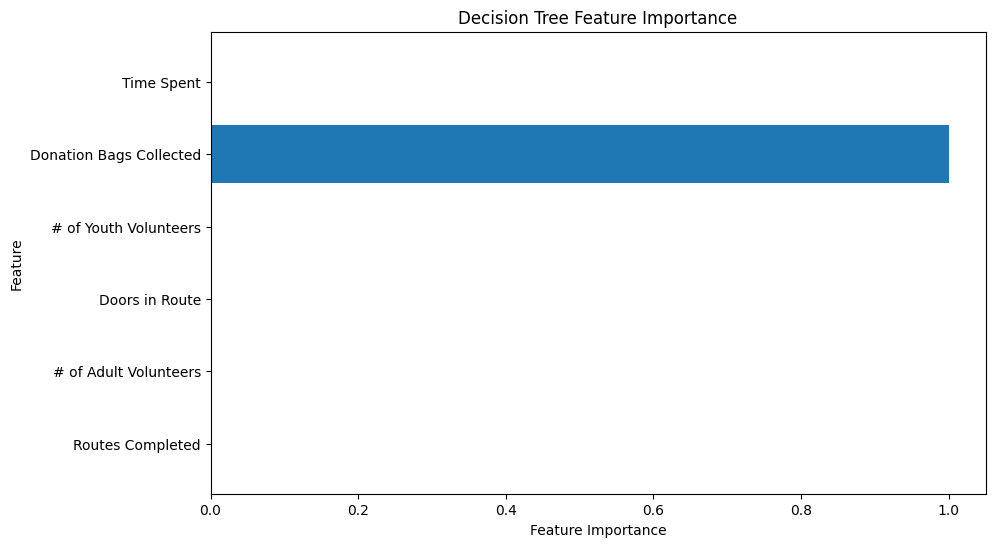

In [ ]:
# Assuming 'decision_tree' is your trained Decision Tree model
feature_importance = decision_tree.feature_importances_
feature_names = X.columns

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance')
plt.show()

Random Forest

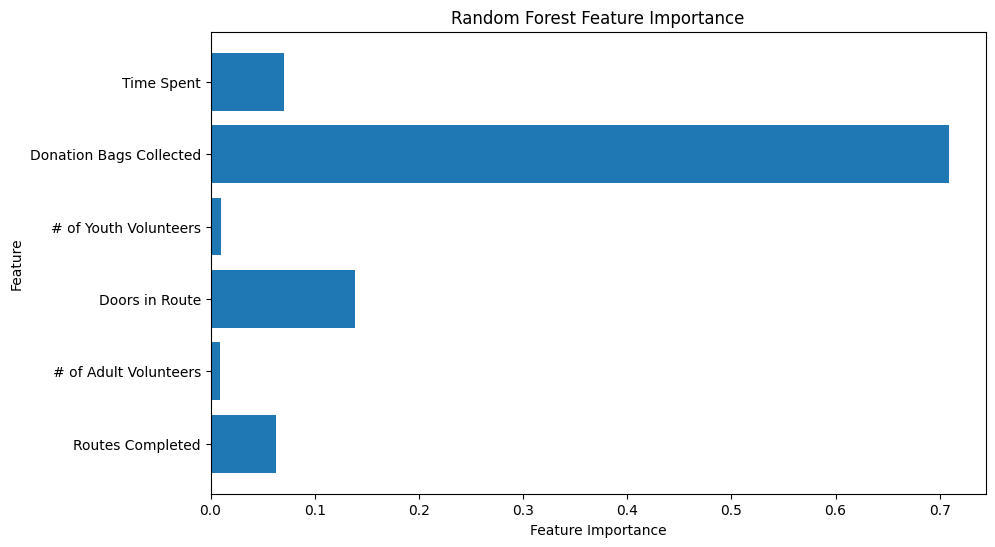

In [ ]:

# Assuming 'random_forest' is your trained Random Forest model
feature_importance = random_forest.feature_importances_
feature_names = X.columns

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

Gradient Boost

ValueError: ignored

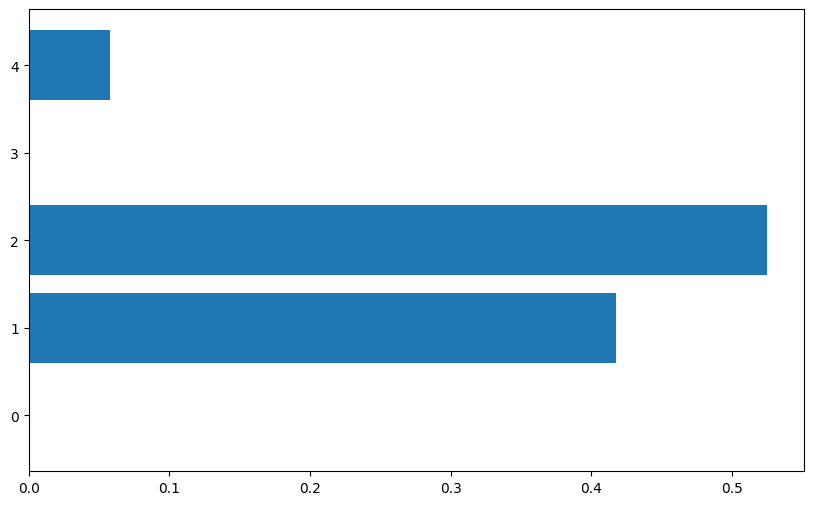

In [ ]:
# Assuming 'gradient_boosting' is your trained Gradient Boosting model
feature_importance = gradient_boosting.feature_importances_
feature_names = X.columns

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Gradient Boosting Feature Importance')
plt.show()